In [291]:
# Import libaries
import re


In [292]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [293]:
# Importing self-made libaries
import standards as s
import life_cycle_assessment as lc
import LCA_plots as lp
import reload_lib as rl
import non_bio_co2 as nbc
import add_plastic_sheet as aps
import import_ecoinvent_and_databases as ied


lib = [s, lc, lp, nbc, aps, ied]

In [323]:
# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care'
# Specifying the LCIA method
lcia_method = 'recipe'

ecoinevnt_paths = {'ev391apos' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_apos_ecoSpold02\datasets",
                   'ev391consq' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_consequential_ecoSpold02\datasets",
                   'ev391cutoff' : r"C:\Users\ruw\Downloads\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets"}
system_path = [r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case1.xlsx', 
                r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case2.xlsx']

rl.reload_lib(lib)
flow_legend, file_name, sheet_name, save_dir, initialization, file_name_unique_process = lc.initilization(path, lcia_method, ecoinevnt_paths, system_path)

Biosphere is already present in the project.
Ecoinvent 3.9.1 is already present in the project.
case1_ev391apos is in the project
case1_ev391consq is in the project
case1_ev391cutoff is in the project
case2_ev391apos is in the project
case2_ev391consq is in the project
case2_ev391cutoff is in the project
case1_cut_off already exist
Chosen flows:
H200 REC
H200 SU
H400 REC
H400 SU
alubox (large + dishwasher)
alubox (large + wipe)
alubox (small + dishwasher)
alubox (small + wipe)


In [324]:
database_project, database_name, flows, lcia_method, db_type = initialization
rl.reload_lib(lib)
FU, impact_category = lc.LCA_initialization(database_name, flows, lcia_method)


Recipe is selected
Initialization is completed


In [326]:
rl.reload_lib(lib)
df, plot_x_axis_all, impact_categories, unique = lc.quick_LCIA(path, initialization, file_name, file_name_unique_process, sheet_name)


Recipe is selected
Initialization is completed
ValueError encountered
Calculating for 21 methods and 21 activities : Total calculations 441
DataFrame with nested lists written to Excel successfully.
DataFrame with nested lists written to Excel successfully.


In [327]:
unique

,"(ReCiPe 2016 v1.03, midpoint (H) Runes edition, acidification: terrestrial, terrestrial acidification potential (TAP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, climate change, global warming potential (GWP1000))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, ecotoxicity: marine, marine ecotoxicity potential (METP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, energy resources: non-renewable, fossil, fossil fuel potential (FFP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, eutrophication: freshwater, freshwater eutrophication potential (FEP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, eutrophication: marine, marine eutrophication potential (MEP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, human toxicity: carcinogenic, human toxicity potential (HTPc))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, human toxicity: non-carcinogenic, human toxicity potential (HTPnc))",...,"(ReCiPe 2016 v1.03, midpoint (H) Runes edition, land use, agricultural land occupation (LOP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, material resources: metals/minerals, surplus ore potential (SOP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, ozone depletion, ozone depletion potential (ODPinfinite))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, particulate matter formation, particulate matter formation potential (PMFP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP))","(ReCiPe 2016 v1.03, midpoint (H) Runes edition, water use, water consumption potential (WCP))","(ReCiPe 2016 v1.03, endpoint (H) Runes edition, total: ecosystem quality, ecosystem quality)","(ReCiPe 2016 v1.03, endpoint (H) Runes edition, total: human health, human health)","(ReCiPe 2016 v1.03, endpoint (H) Runes edition, total: natural resources, natural resources)"
"'H200' (unit, GLO, None)",0.000717,0.247601,0.007639,0.010073,0.673580,0.149743,0.000055,7.737269e-06,0.009803,0.152660,...,0.004108,0.002435,4.656146e-08,0.000309,0.000581,0.000616,0.002001,1.012221e-09,4.961593e-07,0.057155
"'H400' (unit, GLO, None)",0.002052,0.708573,0.021853,0.028816,1.926022,0.428409,0.000157,2.241807e-05,0.028067,0.437110,...,0.011974,0.006964,1.335685e-07,0.000883,0.001664,0.001763,0.005759,2.898876e-09,1.419897e-06,0.163507
"'alubox (large)' (unit, GLO, None)",0.000076,0.023017,0.001941,0.002528,0.110795,0.006856,0.000013,2.894577e-06,0.001756,0.037305,...,0.001156,0.000362,9.839564e-09,0.000031,0.000045,0.000048,0.000722,1.090139e-10,5.672098e-08,0.001997
"'alubox (small)' (unit, GLO, None)",0.000045,0.013494,0.001151,0.001498,0.065355,0.003970,0.000008,1.716879e-06,0.001037,0.022050,...,0.000687,0.000210,5.806817e-09,0.000018,0.000027,0.000028,0.000426,6.406435e-11,3.331159e-08,0.001148
"'autoclave' (unit, GLO, None)",0.009221,2.613781,0.523706,0.659468,27.284128,0.672673,0.002558,1.769465e-03,0.244313,7.418088,...,0.485317,0.056203,2.905570e-06,0.003190,0.005522,0.005660,0.047911,1.676798e-08,7.051190e-06,0.141107
"'market for aluminium, cast alloy' (kilogram, GLO, None)",0.025302,5.804200,3.252091,3.926636,13.224076,1.237342,0.001835,1.424809e-04,1.104179,9.089712,...,0.077364,0.108836,1.481458e-06,0.011103,0.015381,0.015635,0.035214,2.836548e-08,1.819359e-05,0.263860
"'market for electricity, high voltage' (kilowatt hour, DK, None)",0.000504,0.208410,0.012500,0.016302,0.624514,0.054716,0.000163,1.188511e-05,0.016628,0.294784,...,0.043494,0.002096,2.090751e-07,0.000170,0.000409,0.000418,0.003495,1.257078e-09,4.313873e-07,0.010320
"'market for po

In [328]:
for idx in unique.index:
    print(idx)

'H200' (unit, GLO, None)
'H400' (unit, GLO, None)
'alubox (large)' (unit, GLO, None)
'alubox (small)' (unit, GLO, None)
'autoclave' (unit, GLO, None)
'market for aluminium, cast alloy' (kilogram, GLO, None)
'market for electricity, high voltage' (kilowatt hour, DK, None)
'market for polypropylene, granulate' (kilogram, GLO, None)
'mechanical disinfection' (unit, GLO, None)
'mixed heating grid' (megajoule, GLO, None)
'polyethylene production, high density, granulate, recycled' (kilogram, Europe without Switzerland, None)
'polyethylene terephthalate production, granulate, amorphous, recycled' (kilogram, Europe without Switzerland, None)
'polyethylene, high density, granulate, recycled to generic market for high density PE granulate' (kilogram, Europe without Switzerland, None)
'treatment of aluminium scrap, post-consumer, prepared for recycling, at remelter' (kilogram, RER, None)
'treatment of waste paper, unsorted, sorting' (kilogram, RoW, None)
'treatment of waste plastic, mixture, mun

In [329]:
df_rearranged = lc.rearrange_dataframe_index(df)

In [330]:
if 'recipe' in lcia_method:
    df_res, df_endpoint = lc.recipe_dataframe_split(df_rearranged)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        if 'ODPinfinite' in  string[0]:
            string[0] = 'ODP'
        elif '1000' in string[0]:
            string[0] = 'GWP'
        plot_x_axis.append(string[0])

else:
    df_res = df_rearranged
    plot_x_axis = plot_x_axis_all

In [331]:
database_name

'case1_cut_off'

In [332]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_res)
df_col = [df_res.columns[1]]
df_GWP = df_res[df_col]
rl.reload_lib(lib)

colors_ini = s.plot_colors(database_name, 'turbo')




<class 'dict'>


In [333]:
colors = [colors_ini[0],
          colors_ini[3],
          colors_ini[2],
          colors_ini[1],
          colors_ini[4],
          ]
for c in colors_ini[5:]:
    colors.append(c)
inputs = [flow_legend, colors, save_dir, db_type, database_name]

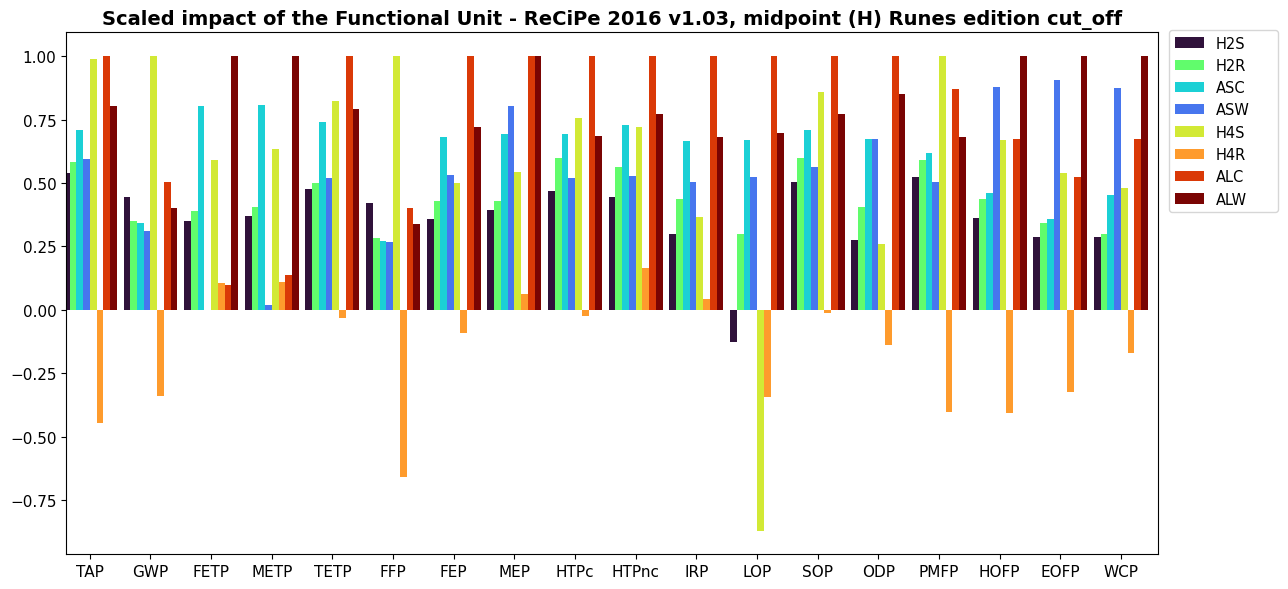

In [334]:
leg_pos_mid = .655
rl.reload_lib(lib)
lp.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_categories, leg_pos_mid)

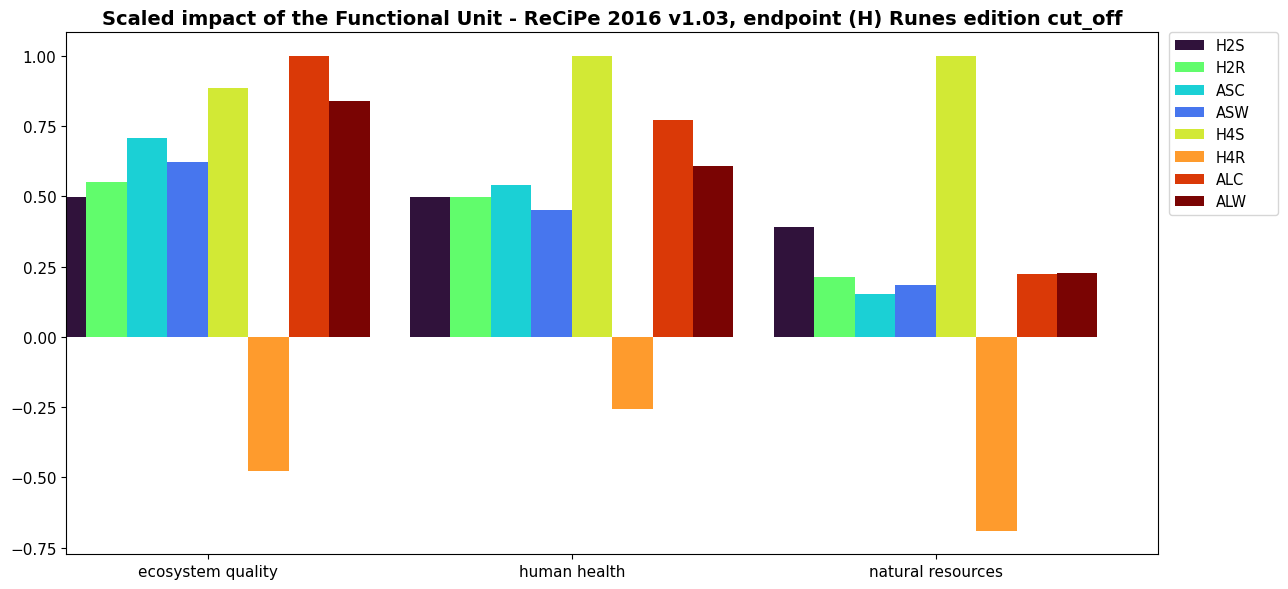

In [335]:
leg_pos_end = 0.65
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, inputs, impact_categories[-3:], leg_pos_end)


'H200' (unit, GLO, None) 0.247601012249758
'H200' (unit, GLO, None) 0.247601012249758
'alubox (small)' (unit, GLO, None) 0.01349444465276269
'alubox (small)' (unit, GLO, None) 0.01349444465276269
'H400' (unit, GLO, None) 0.708572604218402
'alubox (large)' (unit, GLO, None) 0.02301679243669817
'alubox (large)' (unit, GLO, None) 0.02301679243669817


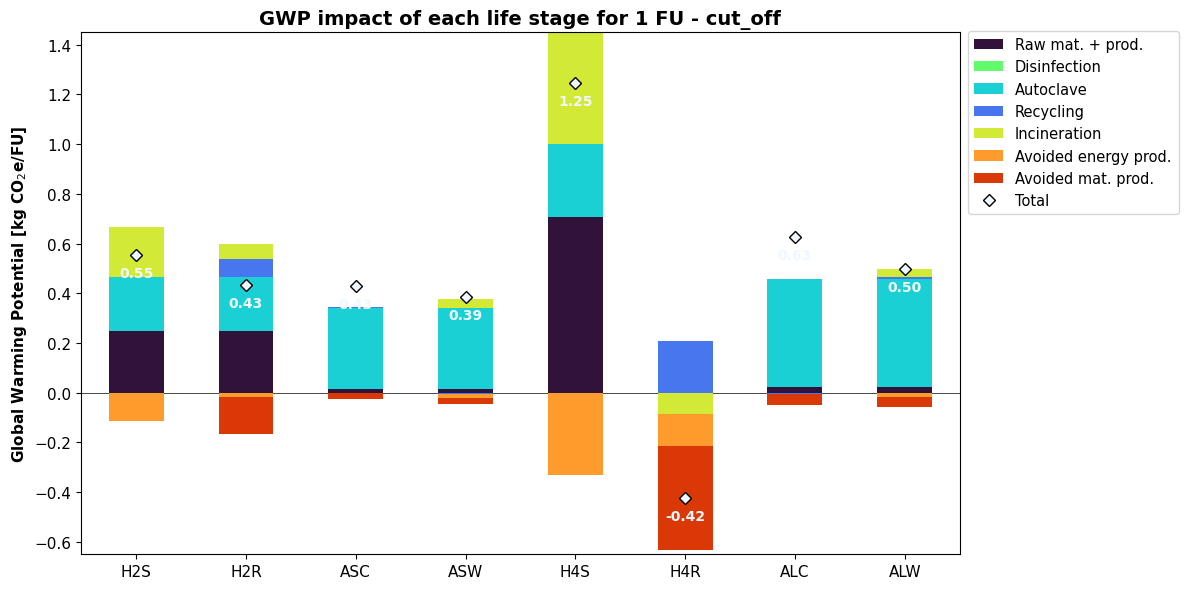

In [338]:
rl.reload_lib(lib)

y_min = -0.6
y_max = 1.4
step = 0.2
leg_pos = 0.652
marker_offset = 0.1
marker_color = 'aliceblue'
y_axis_values = [y_min, y_max, step, leg_pos, marker_offset, marker_color]
lp.gwp_scenario_plot(df_GWP, inputs, y_axis_values)


In [337]:
rl.reload_lib(lib)

amount_of_uses = 513
y_max = [400, 500]
ystep = [50, 50]
xstep = 25
break_even_product = 'container'
color_idx = [0, 2, 4, 6]

plot_controls = [amount_of_uses, y_max, ystep, xstep, break_even_product, color_idx]
lp.break_even_graph(df_GWP, inputs, plot_controls)